In [193]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 300
Nt = 500

def gaussian(x , s, x_o, x_1):
    g1 = 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -(x - x_o)**2 / ( 2. * s**2 ) )
    g2 = 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -(x - x_1)**2 / ( 2. * s**2 ) ) 
    return (g1+g2)
x = np.linspace(-2,2,Nx)

dist = gaussian(x,0.6,-1,1)
uniform_samples = np.random.uniform(-2, 2, Nx)
cdf = np.cumsum(dist)

# Use inverse transform sampling to map uniform samples to your distribution
collocation_points = np.interp(uniform_samples, cdf / cdf[-1], x)

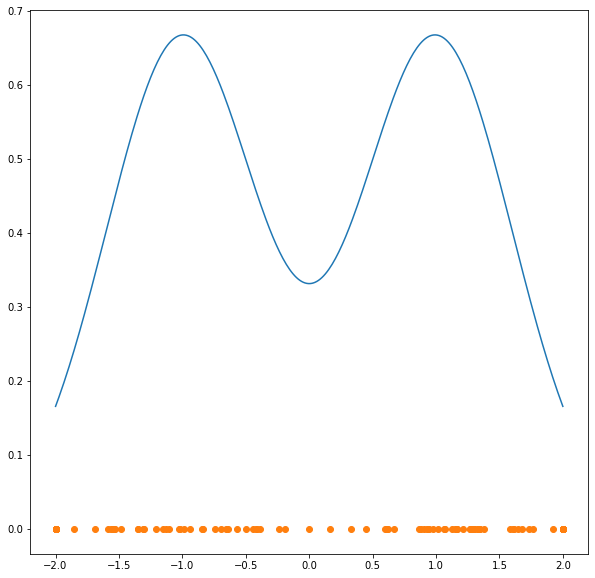

In [194]:
plt.figure(figsize=(10,10))
plt.plot(x,dist)
plt.plot(collocation_points,np.zeros(Nx),'o')
